In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import sys
sys.path.append('/')

In [91]:
germany_dataset_original = pd.read_csv("/content/drive/MyDrive/DSS-Nhom-23-DangNgocTan,NguyenThienHung,PhungTheHung,NguyenThiCamTu/CaiDatThucNghiem/Dataset/Statlog (German Credit Data) Data Set/german.data-numeric.csv")

Mô tả dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [92]:
germany_dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      1000 non-null   int64
 1   A2      1000 non-null   int64
 2   A3      1000 non-null   int64
 3   A4      1000 non-null   int64
 4   A5      1000 non-null   int64
 5   A6      1000 non-null   int64
 6   A7      1000 non-null   int64
 7   A8      1000 non-null   int64
 8   A9      1000 non-null   int64
 9   A10     1000 non-null   int64
 10  A11     1000 non-null   int64
 11  A12     1000 non-null   int64
 12  A13     1000 non-null   int64
 13  A14     1000 non-null   int64
 14  A15     1000 non-null   int64
 15  A16     1000 non-null   int64
 16  A17     1000 non-null   int64
 17  A18     1000 non-null   int64
 18  A19     1000 non-null   int64
 19  A20     1000 non-null   int64
 20  A21     1000 non-null   int64
 21  A22     1000 non-null   int64
 22  A23     1000 non-null   int64
 23  A24     1000 n


## I. Chia dữ liệu


In [93]:
#Tạo Dataframe với tất cả training data ngoại trừ cột mục tiêu
germany_dataset = germany_dataset_original.drop(columns=['A25'])

In [94]:
germany_dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1


In [95]:
#Các giá trị mục tiêu riêng biệt
germany_dataset_label = germany_dataset_original['A25'].values
#Xem các gia trị mục tiêu
germany_dataset_label[0:5]

array([1, 2, 1, 1, 2])

In [96]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
germany_dataset_train, germany_dataset_test, germany_label_train, germany_label_test = train_test_split(germany_dataset, germany_dataset_label, test_size=0.3, random_state=1, stratify=germany_dataset_label)

In [97]:
germany_dataset_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
913,4,11,2,21,4,5,1,2,1,28,3,1,1,2,1,0,0,1,0,0,1,0,0,1
136,4,27,3,86,4,3,3,2,3,27,3,2,1,1,1,0,1,1,0,0,1,0,0,1
802,1,20,4,43,1,5,2,4,2,24,3,2,1,1,1,0,0,1,0,0,1,0,0,1
374,2,60,1,148,2,5,2,4,4,60,1,2,1,2,1,0,0,1,0,0,0,0,0,0
295,2,48,2,100,1,2,2,2,3,26,3,1,1,2,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,4,24,2,16,1,4,3,1,3,32,1,1,2,1,1,0,0,1,0,0,1,0,0,1
572,4,24,2,54,5,1,2,4,2,26,3,1,1,2,1,0,1,1,0,1,0,0,0,0
794,4,24,2,31,3,5,3,3,4,32,3,1,1,2,1,0,0,1,0,1,0,0,0,1
26,4,6,0,4,1,5,4,4,3,39,3,1,1,1,1,0,0,1,0,0,1,0,1,0


## II.Pre-processing


### 1. Phương thức 1: Chuẩn hoá dữ liệu (Standardlization)


In [98]:
# Đối với tập dữ liệu Germany, tập này đã được chuẩn hoá sẵn
germany_dataset_original

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2


### 2. Phương thức 2: Principal Component Analysis (PCA)


#### 2.1. Normalization với Max-Min Scale

In [99]:
# Import thư viện MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Áp dụng scaler
scaler = MinMaxScaler()

#fit vào dữ liệu
germany_dataset_train_scaled = scaler.fit_transform(germany_dataset_train)
#thực hiện transform scale


# thực hiện scale tập test
germany_dataset_test_scaled = scaler.transform(germany_dataset_test)


In [100]:
print(germany_dataset_train_scaled)
print(germany_dataset_test_scaled)

[[1.         0.125      0.5        ... 0.         0.         1.        ]
 [1.         0.41071429 0.75       ... 0.         0.         1.        ]
 [0.         0.28571429 1.         ... 0.         0.         1.        ]
 ...
 [1.         0.35714286 0.5        ... 0.         0.         1.        ]
 [1.         0.03571429 0.         ... 0.         1.         0.        ]
 [0.33333333 0.35714286 0.75       ... 0.         0.         0.        ]]
[[1.         0.         1.         ... 0.         0.         1.        ]
 [0.33333333 0.78571429 0.         ... 0.         0.         0.        ]
 [0.33333333 0.14285714 0.5        ... 0.         0.         0.        ]
 ...
 [1.         0.35714286 1.         ... 0.         0.         1.        ]
 [0.         0.25       0.75       ... 0.         0.         1.        ]
 [1.         0.14285714 0.5        ... 0.         0.         1.        ]]


Xuất tập train sau khi chuẩn hoá sang dạng csv để chạy trên SPSS

In [101]:
train_spss = pd.DataFrame(germany_dataset_train_scaled)
train_spss.to_csv('spss.csv')

#### 2.2. Minimum Average Partial (MAP Test) và Parallel Analysis (PA)


Kết quả chạy MAP test:
```
Run MATRIX procedure: 
 
Velicer's Minimum Average Partial (MAP) Test: 
 
Eigenvalues 
       2.4950 
       2.1112 
       1.8224 
       1.7265 
       1.7127 
       1.3946 
       1.2489 
       1.1842 
       1.1254 
       1.0168 
        .9145 
        .8816 
        .8394 
        .7983 
        .7739 
        .7020 
        .6474 
        .6011 
        .5590 
        .4673 
        .3327 
        .3023 
        .1958 
        .1472 
 
Average Partial Correlations 
                       squared         power4 
          .0000          .0158          .0036 
         1.0000          .0164          .0031 
         2.0000          .0194          .0026 
         3.0000          .0206          .0021 
         4.0000          .0254          .0026 
         5.0000          .0219          .0018 
         6.0000          .0241          .0018 
         7.0000          .0258          .0021 
         8.0000          .0290          .0028 
         9.0000          .0320          .0052 
        10.0000          .0358          .0071 
        11.0000          .0427          .0105 
        12.0000          .0506          .0153 
        13.0000          .0615          .0200 
        14.0000          .0732          .0240 
        15.0000          .0883          .0347 
        16.0000          .1173          .0500 
        17.0000          .1394          .0664 
        18.0000          .1794          .1012 
        19.0000          .1945          .1033 
        20.0000          .2523          .1405 
        21.0000          .3713          .2424 
        22.0000          .5114          .3920 
        23.0000         1.0000         1.0000 
 
The smallest average squared partial correlation is 
        .0158 
 
The smallest average 4rth power partial correlation is 
        .0018 
 
The Number of Components According to the Original (1976) MAP Test is 
  0 
 
The Number of Components According to the Revised (2000) MAP Test is 
  6 
 
------ END MATRIX -----
```



Kết quả chạy PA


```
Run MATRIX procedure: 
 
PARALLEL ANALYSIS: 
 
Principal Components & Random Normal Data Generation 
 
Specifications for this Run: 
Ncases     700 
Nvars       24 
Ndatsets  1000 
Percent     95 
 
Raw Data Eigenvalues, & Mean & Percentile Random Data Eigenvalues 
         Root     Raw Data        Means     Prcntyle 
     1.000000     2.494952     1.348018     1.403159 
     2.000000     2.111195     1.293869     1.331636 
     3.000000     1.822382     1.252845     1.284787 
     4.000000     1.726467     1.217788     1.246439 
     5.000000     1.712743     1.186511     1.214006 
     6.000000     1.394579     1.155973     1.181342 
     7.000000     1.248868     1.127652     1.151608 
     8.000000     1.184179     1.100743     1.123115 
     9.000000     1.125405     1.075135     1.096641 
    10.000000     1.016754     1.050602     1.072676 
    11.000000      .914480     1.025732     1.046043 
    12.000000      .881624     1.001399     1.021075 
    13.000000      .839433      .978512      .997729 
    14.000000      .798315      .955143      .975530 
    15.000000      .773865      .932199      .953178 
    16.000000      .702039      .908832      .928949 
    17.000000      .647357      .886686      .907505 
    18.000000      .601125      .863621      .885143 
    19.000000      .558979      .839794      .861080 
    20.000000      .467255      .815651      .838884 
    21.000000      .332685      .789894      .813805 
    22.000000      .302277      .762661      .787686 
    23.000000      .195843      .733323      .761217 
    24.000000      .147198      .697418      .729031 
 



 
------ END MATRIX -----```



Kết quả chạy như sau:
**MAP test**: **7** components (tuy là 6 nhưng 2 giá trị bằng nhau cho nên ta lấy cả 2)
**PA: 9** components

Vì kết quả cả 2 có giá trị khác nhau, ta lấy khoảng giữa cả 2 là ** 8 components**, một phần là vì kết quả của tác giả cũng lấy khoảng 8

####2.3.Principal Component Analysis (PCA)

In [102]:
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 8
my_pca = PCA (n_components = 8 )

# Fit vào data
my_pca.fit(germany_dataset_train)

# Thực hiện transform 
pca_germany_dataset_train = my_pca.transform(germany_dataset_train)
pca_germany_dataset_test = my_pca.transform(germany_dataset_test)

In [103]:
print("Dữ liệu gốc: ", germany_dataset_train_scaled.shape)
print("Dữ liệu sau PCA:" , pca_germany_dataset_train.shape)


Dữ liệu gốc:  (700, 24)
Dữ liệu sau PCA: (700, 8)


In [104]:
pd.DataFrame(pca_germany_dataset_train)

,0,1,2,3,4,5,6,7
0,-14.047677,-6.644310,7.301784,2.517522,-0.532618,-0.339760,0.447685,1.479820
1,52.853340,-7.609808,10.061207,2.261794,-0.562463,-1.181200,-0.086219,0.108682
2,9.557138,-11.148991,5.470072,-0.794452,-1.570834,2.335263,-1.865192,0.110750
3,121.760665,21.805847,-10.292286,-0.453125,0.200289,1.384116,1.238368,0.785257
4,72.089687,-11.734706,-5.782757,-1.512017,0.541711,-0.947457,0.090725,-0.097467
...,...,...,...,...,...,...,...,...
695,-15.236337,-5.271205,-7.045720,-0.555680,-1.162962,-1.156464,1.766876,1.394953
696,21.266278,-9.490998,4.423678,2.842424,1.660695,-1.116579,0.345337,-2.220467
697,-0.799780,-4.536809,-3.010690,1.713501,-1.138734,0.850602,1.808977,-0.026741
698,-31.681845,4.310345,5.396698,-0.222971,-1.017153,1.162842,3.259658,0.592792


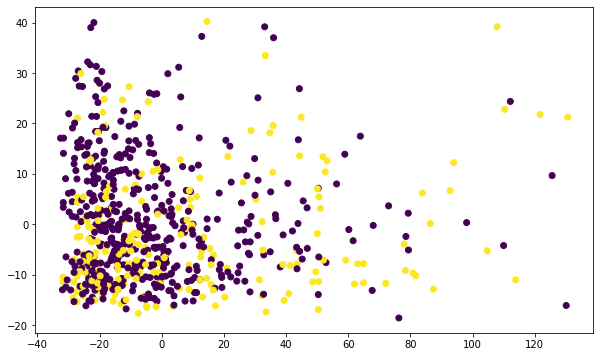

In [105]:
plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_germany_dataset_train[:, 0]
# Thành phần comp số 2
pca_2 = pca_germany_dataset_train[:, 1]
# Thành phần comp số 3
pca_3 = pca_germany_dataset_train[:, 2]
# Thành phần comp số 4
pca_4 = pca_germany_dataset_train[:, 3]
# Thành phần comp số 5
pca_5 = pca_germany_dataset_train[:, 4]
# Thành phần comp số 6
pca_6 = pca_germany_dataset_train[:, 5]
# Thành phần comp số 7
pca_7 = pca_germany_dataset_train[:, 6]
# Thành phần comp số 8
pca_8 = pca_germany_dataset_train[:, 7]

# Vẽ đồ thị demo 2 thuộc tính đầu
plt.scatter(x=pca_1, y = pca_2, c = germany_label_train)

## III. Similarity Classifier



### 3.1. Standard Similarity Classifier

In [106]:
# convert train and test set to dataframe:
df_germany_dataset_train_scaled = pd.DataFrame(germany_dataset_train_scaled)
df_germany_dataset_train_scaled['label'] = germany_label_train
df_germany_dataset_test_scaled = pd.DataFrame(germany_dataset_test_scaled)
df_germany_dataset_test_scaled['label'] = germany_label_test
#-------------------------------------------------------
df_germany_dataset_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,label
0,1.000000,0.125000,0.50,0.115385,0.75,1.00,0.000000,0.333333,0.000000,0.160714,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.000000,0.410714,0.75,0.532051,0.75,0.50,0.666667,0.333333,0.666667,0.142857,1.0,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.000000,0.285714,1.00,0.256410,0.00,1.00,0.333333,1.000000,0.333333,0.089286,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.333333,1.000000,0.25,0.929487,0.25,1.00,0.333333,1.000000,1.000000,0.732143,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.333333,0.785714,0.50,0.621795,0.00,0.25,0.333333,0.333333,0.666667,0.125000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.000000,0.357143,0.50,0.083333,0.00,0.75,0.666667,0.000000,0.666667,0.232143,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
696,1.000000,0.357143,0.50,0.326923,1.00,0.00,0.333333,1.000000,0.333333,0.125000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
697,1.000000,0.357143,0.50,0.179487,0.50,1.00,0.666667,0.666667,1.000000,0.232143,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
698,1.000000,0.035714,0.00,0.006410,0.00,1.00,1.000000,1.000000,0.666667,0.357143,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [107]:

# nhập vào p và m:
list_m = [1,2,3,4,5,6,7,8,9,10]
list_p = [1,2,3,4,5,6,7,8,9,10]
#-------------------------------------------
turns = []
for m in list_m:
    for p in list_p:
        turns = turns + [[m, p]]

f = np.array(range(0,23 + 1)) # feature name list
c = 'label' # target feature name list

# Get list of target variable:
listLabels = df_germany_dataset_train_scaled.drop_duplicates(subset = c)
listLabels = listLabels[c].to_list()
#---------------------------------------------------------

In [108]:
df_germany_dataset_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,label
0,1.000000,0.125000,0.50,0.115385,0.75,1.00,0.000000,0.333333,0.000000,0.160714,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.000000,0.410714,0.75,0.532051,0.75,0.50,0.666667,0.333333,0.666667,0.142857,1.0,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.000000,0.285714,1.00,0.256410,0.00,1.00,0.333333,1.000000,0.333333,0.089286,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.333333,1.000000,0.25,0.929487,0.25,1.00,0.333333,1.000000,1.000000,0.732143,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.333333,0.785714,0.50,0.621795,0.00,0.25,0.333333,0.333333,0.666667,0.125000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.000000,0.357143,0.50,0.083333,0.00,0.75,0.666667,0.000000,0.666667,0.232143,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
696,1.000000,0.357143,0.50,0.326923,1.00,0.00,0.333333,1.000000,0.333333,0.125000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
697,1.000000,0.357143,0.50,0.179487,0.50,1.00,0.666667,0.666667,1.000000,0.232143,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
698,1.000000,0.035714,0.00,0.006410,0.00,1.00,1.000000,1.000000,0.666667,0.357143,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [109]:

def fit_model_similarity_classifier(datalearn, f, c, turns, labels):
    # listLabels = datalearn.drop_duplicates(subset = c)
    # listLabels = listLabels[4].to_list()
    numberOfClass = len(labels)
    classiTooler = {}
    for turn in turns:
        v_each_turn = {}
        m = turn[0]
        p = turn[1]
        # tính fi^m
        for fi in f:
            datalearn[str(fi) + '_power_m'] = datalearn[fi]**m
        #--------------------------------------------
        #Tính vifi:
        vs = {}
        for vi in labels:
            v_rsi = {}
            datalearn_son = datalearn[datalearn[c]==vi]
            len_datalearn_son = len(datalearn_son)
            for fi in f:
                vifi = ((1/len_datalearn_son)*sum(datalearn_son[str(fi) + '_power_m']))**(1/m)
                v_rsi['f'+str(fi)] = vifi
            vs['v'+str(vi)] = v_rsi
        classiTooler['v_rs_m'+str(m)+'_p'+str(p)] = vs
        #--------------------------------------------------------
    return classiTooler

def predict_classifer(datatest, classiTooler, f, listLabels, turns):
    numberOfFeature = len(f)
    for turn_m_p in turns:
        m = turn_m_p[0]
        p = turn_m_p[1]
        turn = classiTooler['v_rs_m'+str(m)+'_p'+str(p)]
        # print('turn :', turn)
        datatest['label_hat_m'+str(m) + '_p' + str(p)] = None # Khởi tạo label predict
        for index, row in datatest.iterrows():
            tmp_max_rs = 0
            tmp_max = 0
            for vi in listLabels:
                x_sum = 0
                for fi in f:
                    vi_cal = turn['v'+str(vi)]['f'+str(fi)]
                    x_a = 1*((1 - abs(row[fi]**p - vi_cal**p))**(m/p))
                    x_sum = x_sum+x_a
                x_sum = (x_sum*(1/numberOfFeature))**(1/m)
                x_sum = x_sum.real
                if x_sum > tmp_max:
                    tmp_max = x_sum
                    tmp_max_rs = vi
            datatest['label_hat_m'+str(m) + '_p' + str(p)][index] = tmp_max_rs
    return datatest

def cal_error(predicts, turns, c):
    results = []
    for turn_m_p in turns:
        results_i = {}
        m = turn_m_p[0]
        p = turn_m_p[1]
        # turn = classiTooler['v_rs_m'+str(m)+'_p'+str(p)]
        predicts['target - hat m' + str(m) + 'p' + str(p)] = predicts[c] - predicts['label_hat_m'+str(m) + '_p' + str(p)]
        exac = len(predicts[predicts['target - hat m' + str(m) + 'p' + str(p)]==0])
        mape = (exac/len(predicts))*100
        results_i['m'] = m
        results_i['p'] = p
        results_i['mape'] = mape
        results = results + [results_i]
    return results


In [110]:
idealVectors = fit_model_similarity_classifier(df_germany_dataset_train_scaled, f, c, turns, listLabels)
idealVectors

{'v_rs_m10_p1': {'v1': {'f0': 0.9286082856981416,
   'f1': 0.656981137871722,
   'f10': 0.9840014229733646,
   'f11': 0.5517127749363879,
   'f12': 0.8331881817513485,
   'f13': 0.9161011086968889,
   'f14': 0.7332003440482795,
   'f15': 0.8588528670477658,
   'f16': 0.8207885384064793,
   'f17': 0.9906354788946283,
   'f18': 0.7007985515957754,
   'f19': 0.834236890454548,
   'f2': 0.8982820865930622,
   'f20': 0.9707122948836532,
   'f21': 0.6705090483804793,
   'f22': 0.861231013197762,
   'f23': 0.9527546702539761,
   'f3': 0.5933148698737304,
   'f4': 0.8571485172606181,
   'f5': 0.8860999389802433,
   'f6': 0.7925433020789755,
   'f7': 0.9227225214413172,
   'f8': 0.8103006564906386,
   'f9': 0.6568523613428816},
  'v2': {'f0': 0.8410130627801686,
   'f1': 0.7022463990437575,
   'f10': 0.9700967975214532,
   'f11': 0.5898415944030945,
   'f12': 0.8285010599204009,
   'f13': 0.9057065964168545,
   'f14': 0.653868169060068,
   'f15': 0.8893432356994094,
   'f16': 0.7297974162510606

In [111]:
predicts = predict_classifer(df_germany_dataset_test_scaled, idealVectors, f, listLabels, turns)
predicts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,label,label_hat_m1_p1,label_hat_m1_p2,label_hat_m1_p3,label_hat_m1_p4,label_hat_m1_p5,label_hat_m1_p6,label_hat_m1_p7,label_hat_m1_p8,label_hat_m1_p9,label_hat_m1_p10,label_hat_m2_p1,label_hat_m2_p2,label_hat_m2_p3,label_hat_m2_p4,label_hat_m2_p5,...,label_hat_m7_p1,label_hat_m7_p2,label_hat_m7_p3,label_hat_m7_p4,label_hat_m7_p5,label_hat_m7_p6,label_hat_m7_p7,label_hat_m7_p8,label_hat_m7_p9,label_hat_m7_p10,label_hat_m8_p1,label_hat_m8_p2,label_hat_m8_p3,label_hat_m8_p4,label_hat_m8_p5,label_hat_m8_p6,label_hat_m8_p7,label_hat_m8_p8,label_hat_m8_p9,label_hat_m8_p10,label_hat_m9_p1,label_hat_m9_p2,label_hat_m9_p3,label_hat_m9_p4,label_hat_m9_p5,label_hat_m9_p6,label_hat_m9_p7,label_hat_m9_p8,label_hat_m9_p9,label_hat_m9_p10,label_hat_m10_p1,label_hat_m10_p2,label_hat_m10_p3,label_hat_m10_p4,label_hat_m10_p5,label_hat_m10_p6,label_hat_m10_p7,label_hat_m10_p8,label_hat_m10_p9,label_hat_m10_p10
0,1.000000,0.000000,1.00,0.198718,0.00,0.75,0.333333,0.000000,0.000000,0.321429,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0.333333,0.785714,0.00,1.160256,0.00,0.50,0.333333,0.333333,0.333333,0.232143,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2
2,0.333333,0.142857,0.50,0.173077,0.00,0.25,0.333333,0.000000,0.000000,0.267857,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2
3,0.000000,0.142857,0.50,0.198718,0.00,1.00,0.666667,1.000000,1.000000,0.285714,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,2,1,1,1,1,1,1,1,1,1,2,2,1,1,...,1,1,1,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2
4,1.000000,0.357143,0.25,0.083333,0.00,0.75,0.666667,1.000000,0.666667,0.553571,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.333333,0.357143,1.00,0.057692,0.25,0.25,0.666667,1.000000,1.000000,0.339286,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2,2,2,2,1,1,1,1,1,1,1,2,2,2,2,2,...,1,1,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2
296,1.000000,0.250000,1.00,0.096154,0.00,0.50,0.333333,0.333333,1.000000,0.160714,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
297,1.000000,0.357143,1.00,0.141026,0.25,0.75,1.000000,0.666667,0.333333,0.142857,1.0,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
298,0.000000,0.250000,0.75,0.525641,1.00,0.50,0.333333,0.333333,0.666667,0.071429,1.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,2,2,1,1,1,1,1,1,1,1,2,2,2,2,1,...,1,1,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2


In [112]:
results = cal_error(predicts, turns, c)
results

[{'m': 1, 'mape': 69.33333333333334, 'p': 1},
 {'m': 1, 'mape': 75.0, 'p': 2},
 {'m': 1, 'mape': 76.33333333333333, 'p': 3},
 {'m': 1, 'mape': 75.33333333333333, 'p': 4},
 {'m': 1, 'mape': 74.33333333333333, 'p': 5},
 {'m': 1, 'mape': 73.66666666666667, 'p': 6},
 {'m': 1, 'mape': 74.0, 'p': 7},
 {'m': 1, 'mape': 73.66666666666667, 'p': 8},
 {'m': 1, 'mape': 73.66666666666667, 'p': 9},
 {'m': 1, 'mape': 73.66666666666667, 'p': 10},
 {'m': 2, 'mape': 66.66666666666666, 'p': 1},
 {'m': 2, 'mape': 68.0, 'p': 2},
 {'m': 2, 'mape': 70.33333333333334, 'p': 3},
 {'m': 2, 'mape': 75.0, 'p': 4},
 {'m': 2, 'mape': 74.33333333333333, 'p': 5},
 {'m': 2, 'mape': 75.33333333333333, 'p': 6},
 {'m': 2, 'mape': 74.66666666666667, 'p': 7},
 {'m': 2, 'mape': 74.0, 'p': 8},
 {'m': 2, 'mape': 74.0, 'p': 9},
 {'m': 2, 'mape': 73.33333333333333, 'p': 10},
 {'m': 3, 'mape': 65.33333333333333, 'p': 1},
 {'m': 3, 'mape': 67.33333333333333, 'p': 2},
 {'m': 3, 'mape': 66.66666666666666, 'p': 3},
 {'m': 3, 'mape': 

Accuracy 0.7633333333333333
Report               precision    recall  f1-score   support

           1       0.80      0.89      0.84       210
           2       0.64      0.48      0.55        90

    accuracy                           0.76       300
   macro avg       0.72      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.7633333333333333')

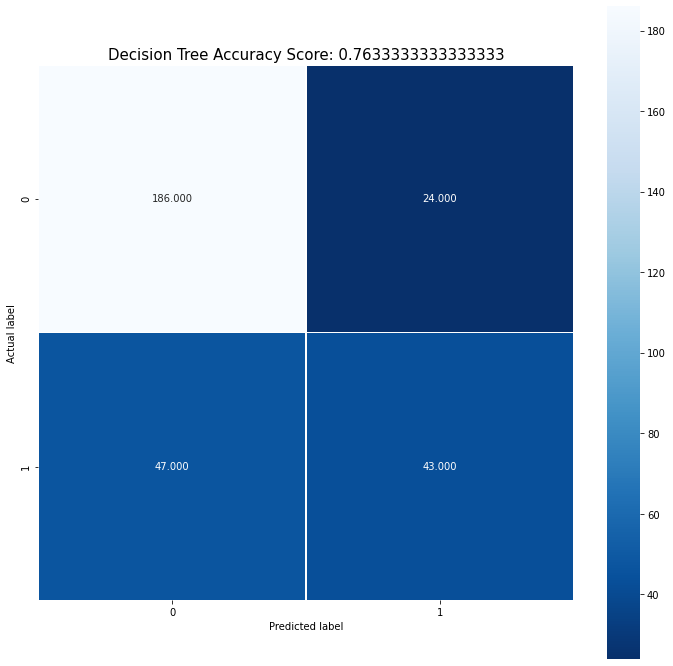

In [113]:
#Tính ma trận nhầm lẫn
from sklearn import metrics
# t1 = end_time - start_time
# print('thời gian chạy thuật là', t1)
p1 = metrics.accuracy_score(germany_label_test, predicts['label_hat_m1_p3'].to_list())
print("Accuracy", p1)
print("Report", metrics.classification_report(germany_label_test, predicts['label_hat_m1_p3'].to_list()))

tree_cm = metrics.confusion_matrix(germany_label_test, predicts['label_hat_m1_p3'].to_list())
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(p1)
plt.title(title, size = 15)

### 3.2. Standard similarity classifier (PCA, 8 PCs)

In [114]:
# Áp dụng scaler
scaler = MinMaxScaler()

#fit vào dữ liệu
pca_germany_dataset_train_scaled = scaler.fit_transform(pca_germany_dataset_train)
#thực hiện transform scale


# thực hiện scale tập test
pca_germany_dataset_test_scaled = scaler.transform(pca_germany_dataset_test)


In [115]:
# convert train and test set to dataframe:
df_pca_germany_dataset_train_scaled = pd.DataFrame(pca_germany_dataset_train_scaled)
df_pca_germany_dataset_test_scaled = pd.DataFrame(pca_germany_dataset_test_scaled)
df_pca_germany_dataset_train_scaled['label'] = germany_label_train
df_pca_germany_dataset_test_scaled['label'] = germany_label_test
#-------------------------------------------------------
df_pca_germany_dataset_train_scaled

,0,1,2,3,4,5,6,7,label
0,0.113405,0.203287,0.501268,0.806969,0.345534,0.422094,0.549531,0.730548,1
1,0.523263,0.186886,0.535948,0.766216,0.341739,0.297200,0.464002,0.511054,1
2,0.258016,0.126764,0.478247,0.279177,0.213503,0.819145,0.179016,0.511385,1
3,0.945413,0.686580,0.280145,0.333570,0.438739,0.677968,0.676196,0.619361,2
4,0.641112,0.116815,0.336821,0.164827,0.482158,0.331894,0.492347,0.478053,2
...,...,...,...,...,...,...,...,...,...
695,0.106123,0.226613,0.320948,0.317227,0.265373,0.300872,0.760861,0.716962,1
696,0.329751,0.154929,0.465096,0.858744,0.624460,0.306792,0.533135,0.138200,1
697,0.194566,0.239088,0.371661,0.678841,0.268454,0.598779,0.767606,0.489375,1
698,0.005373,0.389378,0.477325,0.370247,0.283915,0.645124,1.000000,0.588551,1


In [116]:
listLabels = set(germany_label_train)
listLabels

{1, 2}

In [117]:
# nhập vào p và m:
list_m = [1,2,3,4,5,6,7,8,9,10]
list_p = [1,2,3,4,5,6,7,8,9,10]
#-------------------------------------------
turns = []
for m in list_m:
    for p in list_p:
        turns = turns + [[m, p]]

f = np.array(range(0,7 + 1)) # feature name list
c = 'label'

In [118]:
idealVectors = fit_model_similarity_classifier(df_pca_germany_dataset_train_scaled, f, c, turns, listLabels)
idealVectors

{'v_rs_m10_p1': {'v1': {'f0': 0.5901316930390402,
   'f1': 0.6507429087885745,
   'f2': 0.4854417483662677,
   'f3': 0.7664845185712178,
   'f4': 0.5922204043107823,
   'f5': 0.6392995272892357,
   'f6': 0.641998642824131,
   'f7': 0.655071584260017},
  'v2': {'f0': 0.6537353221471126,
   'f1': 0.6477976562470562,
   'f2': 0.6142391057069013,
   'f3': 0.6669543072114437,
   'f4': 0.5986599540374398,
   'f5': 0.6871963026803461,
   'f6': 0.6665023665431287,
   'f7': 0.6591925039873059}},
 'v_rs_m10_p10': {'v1': {'f0': 0.5901316930390402,
   'f1': 0.6507429087885745,
   'f2': 0.4854417483662677,
   'f3': 0.7664845185712178,
   'f4': 0.5922204043107823,
   'f5': 0.6392995272892357,
   'f6': 0.641998642824131,
   'f7': 0.655071584260017},
  'v2': {'f0': 0.6537353221471126,
   'f1': 0.6477976562470562,
   'f2': 0.6142391057069013,
   'f3': 0.6669543072114437,
   'f4': 0.5986599540374398,
   'f5': 0.6871963026803461,
   'f6': 0.6665023665431287,
   'f7': 0.6591925039873059}},
 'v_rs_m10_p2':

In [119]:
predicts = predict_classifer(df_pca_germany_dataset_test_scaled, idealVectors, f, listLabels, turns)
predicts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,2,3,4,5,6,7,label,label_hat_m1_p1,label_hat_m1_p2,label_hat_m1_p3,label_hat_m1_p4,label_hat_m1_p5,label_hat_m1_p6,label_hat_m1_p7,label_hat_m1_p8,label_hat_m1_p9,label_hat_m1_p10,label_hat_m2_p1,label_hat_m2_p2,label_hat_m2_p3,label_hat_m2_p4,label_hat_m2_p5,label_hat_m2_p6,label_hat_m2_p7,label_hat_m2_p8,label_hat_m2_p9,label_hat_m2_p10,label_hat_m3_p1,label_hat_m3_p2,label_hat_m3_p3,label_hat_m3_p4,label_hat_m3_p5,label_hat_m3_p6,label_hat_m3_p7,label_hat_m3_p8,label_hat_m3_p9,label_hat_m3_p10,label_hat_m4_p1,...,label_hat_m7_p1,label_hat_m7_p2,label_hat_m7_p3,label_hat_m7_p4,label_hat_m7_p5,label_hat_m7_p6,label_hat_m7_p7,label_hat_m7_p8,label_hat_m7_p9,label_hat_m7_p10,label_hat_m8_p1,label_hat_m8_p2,label_hat_m8_p3,label_hat_m8_p4,label_hat_m8_p5,label_hat_m8_p6,label_hat_m8_p7,label_hat_m8_p8,label_hat_m8_p9,label_hat_m8_p10,label_hat_m9_p1,label_hat_m9_p2,label_hat_m9_p3,label_hat_m9_p4,label_hat_m9_p5,label_hat_m9_p6,label_hat_m9_p7,label_hat_m9_p8,label_hat_m9_p9,label_hat_m9_p10,label_hat_m10_p1,label_hat_m10_p2,label_hat_m10_p3,label_hat_m10_p4,label_hat_m10_p5,label_hat_m10_p6,label_hat_m10_p7,label_hat_m10_p8,label_hat_m10_p9,label_hat_m10_p10
0,0.178419,0.383453,0.609012,0.330522,0.165844,0.207406,0.370921,0.699605,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,1.135976,0.279668,0.610046,0.154959,0.516117,0.413709,0.652630,0.847389,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,0.168328,0.304913,0.507577,0.125858,0.564107,0.236407,0.438407,0.607409,1,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,2,2,2,2
3,0.192149,0.327265,0.517300,0.240184,0.363585,0.924967,0.616119,0.495050,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2
4,0.106865,0.528020,0.279771,0.316144,0.339967,0.495910,0.901227,0.463409,1,1,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,...,1,1,1,1,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.082914,0.324611,0.293743,0.342286,0.442775,0.530476,0.391758,0.167748,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,...,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,2,2,2
296,0.107691,0.179683,0.408238,0.337876,0.176214,0.316672,0.529098,0.306501,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2,1,...,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,2,2,2
297,0.158873,0.151231,0.363074,0.543078,0.126379,0.400298,0.363726,0.462990,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,1,1,2,2,2
298,0.502108,0.145991,0.648369,0.742558,0.611175,0.597290,0.239186,0.545449,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [120]:
results = cal_error(predicts, turns, c)
results

[{'m': 1, 'mape': 65.66666666666666, 'p': 1},
 {'m': 1, 'mape': 68.33333333333333, 'p': 2},
 {'m': 1, 'mape': 69.66666666666667, 'p': 3},
 {'m': 1, 'mape': 66.66666666666666, 'p': 4},
 {'m': 1, 'mape': 68.66666666666667, 'p': 5},
 {'m': 1, 'mape': 67.66666666666666, 'p': 6},
 {'m': 1, 'mape': 67.0, 'p': 7},
 {'m': 1, 'mape': 67.0, 'p': 8},
 {'m': 1, 'mape': 67.0, 'p': 9},
 {'m': 1, 'mape': 66.33333333333333, 'p': 10},
 {'m': 2, 'mape': 60.0, 'p': 1},
 {'m': 2, 'mape': 58.666666666666664, 'p': 2},
 {'m': 2, 'mape': 58.666666666666664, 'p': 3},
 {'m': 2, 'mape': 59.333333333333336, 'p': 4},
 {'m': 2, 'mape': 61.33333333333333, 'p': 5},
 {'m': 2, 'mape': 61.66666666666667, 'p': 6},
 {'m': 2, 'mape': 62.0, 'p': 7},
 {'m': 2, 'mape': 62.33333333333333, 'p': 8},
 {'m': 2, 'mape': 66.33333333333333, 'p': 9},
 {'m': 2, 'mape': 66.33333333333333, 'p': 10},
 {'m': 3, 'mape': 57.99999999999999, 'p': 1},
 {'m': 3, 'mape': 62.66666666666667, 'p': 2},
 {'m': 3, 'mape': 59.333333333333336, 'p': 3},
 

Accuracy 0.72
Report               precision    recall  f1-score   support

           1       0.72      0.97      0.83       210
           2       0.65      0.14      0.24        90

    accuracy                           0.72       300
   macro avg       0.69      0.56      0.53       300
weighted avg       0.70      0.72      0.65       300



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.72')

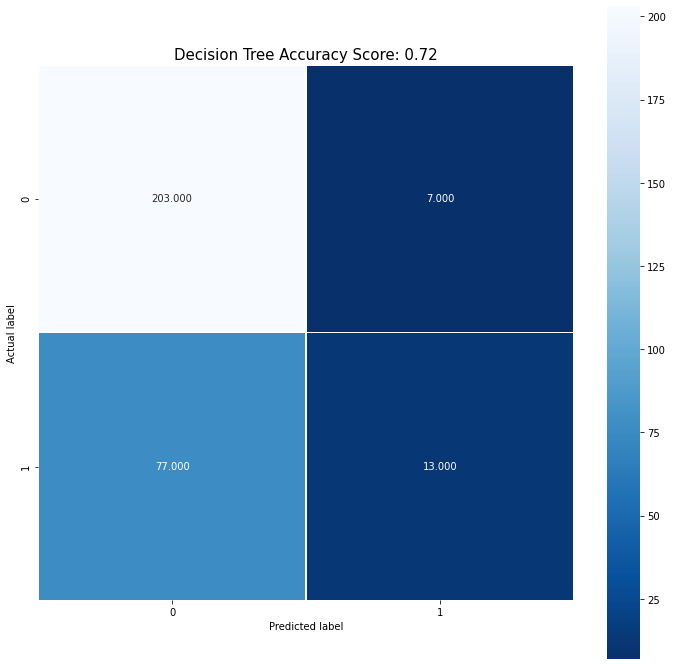

In [121]:
#Tính ma trận nhầm lẫn
from sklearn import metrics
# t1 = end_time - start_time
# print('thời gian chạy thuật là', t1)
p1 = metrics.accuracy_score(germany_label_test, predicts['label_hat_m10_p4'].to_list())
print("Accuracy", p1)
print("Report", metrics.classification_report(germany_label_test, predicts['label_hat_m10_p4'].to_list()))

tree_cm = metrics.confusion_matrix(germany_label_test, predicts['label_hat_m10_p4'].to_list())
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(p1)
plt.title(title, size = 15)

## IV. Novel Similarity Classifier


### 4.1. Novel Similarity Classifier

Thuật toán Jump Method, nguồn code: https://github.com/v-iashin/JumpMethod

Có chỉnh sửa lại cho phù hợp với thuật toán Novel Similarity Classifiers

In [122]:
# convert train and test set to dataframe:
df_germany_dataset_train_scaled = pd.DataFrame(germany_dataset_train_scaled)
df_germany_dataset_train_scaled['label'] = germany_label_train
df_germany_dataset_test_scaled = pd.DataFrame(germany_dataset_test_scaled)
df_germany_dataset_test_scaled['label'] = germany_label_test
#-------------------------------------------------------
# Get list of target variable:
listLabels = df_germany_dataset_train_scaled.drop_duplicates(subset = c)
listLabels = listLabels[c].to_list()
#---------------------------------------------------------
# Novel similarity classifier:
# Tach tap train thanh n tap con (n = so label)
datasTrainNovel = {}
for target in listLabels:
    dataTrain_son = df_germany_dataset_train_scaled[df_germany_dataset_train_scaled[c] == target]
    del dataTrain_son[c]
    datasTrainNovel[target] = dataTrain_son
df_germany_dataset_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,label
0,1.000000,0.125000,0.50,0.115385,0.75,1.00,0.000000,0.333333,0.000000,0.160714,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.000000,0.410714,0.75,0.532051,0.75,0.50,0.666667,0.333333,0.666667,0.142857,1.0,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.000000,0.285714,1.00,0.256410,0.00,1.00,0.333333,1.000000,0.333333,0.089286,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.333333,1.000000,0.25,0.929487,0.25,1.00,0.333333,1.000000,1.000000,0.732143,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.333333,0.785714,0.50,0.621795,0.00,0.25,0.333333,0.333333,0.666667,0.125000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.000000,0.357143,0.50,0.083333,0.00,0.75,0.666667,0.000000,0.666667,0.232143,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
696,1.000000,0.357143,0.50,0.326923,1.00,0.00,0.333333,1.000000,0.333333,0.125000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
697,1.000000,0.357143,0.50,0.179487,0.50,1.00,0.666667,0.666667,1.000000,0.232143,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
698,1.000000,0.035714,0.00,0.006410,0.00,1.00,1.000000,1.000000,0.666667,0.357143,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [123]:
datasTrainNovel

{1:            0         1     2         3     4   ...   19   20   21   22   23
 0    1.000000  0.125000  0.50  0.115385  0.75  ...  0.0  1.0  0.0  0.0  1.0
 1    1.000000  0.410714  0.75  0.532051  0.75  ...  0.0  1.0  0.0  0.0  1.0
 2    0.000000  0.285714  1.00  0.256410  0.00  ...  0.0  1.0  0.0  0.0  1.0
 5    1.000000  0.035714  1.00  0.057692  1.00  ...  0.0  1.0  0.0  0.0  1.0
 6    0.333333  0.142857  0.50  0.044872  0.75  ...  0.0  1.0  0.0  0.0  1.0
 ..        ...       ...   ...       ...   ...  ...  ...  ...  ...  ...  ...
 693  1.000000  0.357143  0.50  0.384615  1.00  ...  0.0  1.0  0.0  0.0  0.0
 695  1.000000  0.357143  0.50  0.083333  0.00  ...  0.0  1.0  0.0  0.0  1.0
 696  1.000000  0.357143  0.50  0.326923  1.00  ...  1.0  0.0  0.0  0.0  0.0
 697  1.000000  0.357143  0.50  0.179487  0.50  ...  1.0  0.0  0.0  0.0  1.0
 698  1.000000  0.035714  0.00  0.006410  0.00  ...  0.0  1.0  0.0  1.0  0.0
 
 [490 rows x 24 columns],
 2:            0         1     2         3   

In [124]:
import numpy as np
from sklearn.cluster import KMeans

def cal_error_novel(predicts, turns, c):
    results = []
    for turn_m_p in turns:
        m = turn_m_p[0]
        p = turn_m_p[1]
        list_Y = list(set([1, p/2]))
        for Y in list_Y:
            results_i = {}
            # turn = classiTooler['v_rs_m'+str(m)+'_p'+str(p)]
            predicts['target - hat m' + str(m) + 'p' + str(p) + 'Y' + str(float(Y))] = predicts[c] - predicts['label_hat_m'+str(m) + '_p' + str(p) + '_Y' + str(float(Y))]
            exac = len(predicts[predicts['target - hat m' + str(m) + 'p' + str(p) + 'Y' + str(float(Y))]==0])
            mape = (exac/len(predicts))*100
            results_i['m'] = m
            results_i['p'] = p
            results_i['Y'] = Y if Y != (p/2) else 'p/2'
            results_i['% chính xác'] = round(mape, 2)
            results = results + [results_i]
    return results

class JumpsMethod(object):

    def __init__(self, data):
        self.data = data
        # dimension of 'data'; data.shape[0] would be size of 'data'
        self.p = data.shape[1]
        # vector of variances (1 by p)
        """ 'using squared error rather than Mahalanobis distance' (SJ, p. 12)
        sigmas = np.var(data, axis=0)
        ## by following the authors we assume 0 covariance between p variables (SJ, p. 12)
        # start with zero-matrix (p by p)
        self.Sigma = np.zeros((self.p, self.p), dtype=np.float32)
        # fill the main diagonal with variances for
        np.fill_diagonal(self.Sigma, val=sigmas)
        # calculate the inversed matrix
        self.Sigma_inv = np.linalg.inv(self.Sigma)"""


    def Distortions(self, cluster_range=range(1, 10 + 1), random_state=0, c=4):
        """ returns a vector of calculated distortions for each cluster number.
            If the number of clusters is 0, distortion is 0 (SJ, p. 2)
            'cluster_range' -- range of numbers of clusters for KMeans;
            'data' -- n by p array """
        # dummy vector for Distortions
        self.distortions = np.repeat(0, len(cluster_range) + 1).astype(np.float32)
        # self.df_data = {}
        self.centresAndIVector = {}
        # for each k in cluster range implement
        all_centres = []
        for k in cluster_range:
            # initialize and fit the clusterer giving k in the loop
            KM = KMeans(n_clusters=k, random_state=random_state)
            KM.fit(self.data)
            # calculate centers of suggested k clusters
            centers = KM.cluster_centers_
            all_centres = all_centres + centers.tolist()
            df_data = pd.DataFrame(self.data)
            labels = KM.labels_
            df_data[c] = labels
            # self.df_data[k] = df_data
            # since we need to calculate the mean of mins create dummy vec
            for_mean = np.repeat(0, len(self.data)).astype(np.float32)
            idealVectors = fit_model_similarity_classifier(df_data, f, c, turns, labels)
            tmp = {}
            # tmp['Centres'] = centers
            tmp['IdealVector'] = idealVectors
            self.centresAndIVector['k='+str(k)] = tmp
            # for each observation (i) in data implement
            for i in range(len(self.data)):
                # dummy for vec of distances between i-th obs and k-center
                dists = np.repeat(0, k).astype(np.float32)

                # for each cluster in KMean clusters implement
                for cluster in range(k):
                    # calculate the within cluster dispersion
                    tmp = np.transpose(self.data[i] - centers[cluster])
                    """ 'using squared error rather than Mahalanobis distance' (SJ, p. 12)
                    dists[cluster] = tmp.dot(self.Sigma_inv).dot(tmp)"""
                    dists[cluster] = tmp.dot(tmp)

                # take the lowest distance to a class
                for_mean[i] = min(dists)

            # take the mean for mins for each observation
            self.distortions[k] = np.mean(for_mean) / self.p
        self.centresAndIVector['Centres'] = all_centres
        return self.distortions


    def Jumps(self, Y=None):
        """ returns a vector of jumps for each cluster """
        # if Y is not specified use the one that suggested by the authors (SJ, p. 2)
        if Y is None:
            self.Y = self.p / 2

        else:
            self.Y = Y

        # the first (by convention it is 0) and the second elements
        self.jumps = [0] + [self.distortions[1] ** (-self.Y) - 0]
        self.jumps += [self.distortions[k] ** (-self.Y) \
                       - self.distortions[k-1] ** (-self.Y) \
                       for k in range(2, len(self.distortions))]

        # calculate recommended number of clusters
        self.recommended_cluster_number = np.argmax(np.array(self.jumps))

        return self.jumps


# Ideal Vectors and Centres
def get_ideal_vectors_and_centres (k, list_Y, c, datasTrainNovel):
    k = 10
    centresAndIVector = {}
    for target in listLabels:
        jm = JumpsMethod(data=datasTrainNovel[target].values)
        jm.Distortions(cluster_range=range(1, k + 1), random_state=0, c=c)
        tmp2 = {}
        for Y in list_Y:
            jm.Jumps(Y=Y)
            K_s = jm.recommended_cluster_number
            centresAndIVector_i = jm.centresAndIVector
            tmp = {}
            tmp['Centres'] = centresAndIVector_i['Centres']
            tmp['IdealVector'] = centresAndIVector_i['k='+str(K_s)]['IdealVector']
            tmp['K'] = K_s
            tmp2['Y='+str(float(Y))] = tmp
        centresAndIVector['target='+str(target)] = tmp2
    return centresAndIVector

# Predict:
def sum_descending_to_1(n):
    my_sum = 0
    i=0
    while i <= n:
        my_sum = my_sum + i
        i+=1
    return my_sum

def predict_novel_similarity_classifiers (df_germany_dataset_test_scaled, f, turns, listLabels, centresAndIVector):
    allIdealVectors_labels = {}
    numberOfFeature = len(f)
    for turn in turns:
        m = turn[0]
        p = turn[1]
        list_Y = list(set([1, p/2]))
        for Y in list_Y:
            df_germany_dataset_test_scaled['label_hat_m'+str(m) + '_p' + str(p) + '_Y' + str(float(Y))] = None # Khởi tạo label predict
            # Loop in rows of test set:
            for index, row in df_germany_dataset_test_scaled.iterrows():
                tmp_max_rs = 0
                tmp_max = 0
                for target in listLabels:
                    centresAndIVector_son = centresAndIVector['target='+str(target)]['Y='+str(float(Y))]
                    centres = centresAndIVector_son['Centres']
                    KOnTarget = centresAndIVector_son['K']
                    centresAndIVector_son = centresAndIVector_son['IdealVector']

                    IdealVectors_inTurn = centresAndIVector_son['v_rs_m'+str(m)+'_p'+str(p)]
                    # Add centres to ideal vector:
                    for i in range(KOnTarget, KOnTarget + sum_descending_to_1(KOnTarget)): # i ~ [10-64]
                        j = 0
                        tmp = {}
                        for centre in centres[i-KOnTarget]:
                            tmp["f"+str(j)] = centre
                        IdealVectors_inTurn['v'+str(i)] = tmp
                    for vi in range(0, KOnTarget + sum_descending_to_1(KOnTarget)):
                        x_sum = 0
                        for fi in f:
                            vi_cal = IdealVectors_inTurn['v'+str(vi)]["f"+str(j)]
                            x_a = 1*((1 - abs(row[fi]**p - vi_cal**p))**(m/p))
                            x_sum = x_sum+x_a
                        x_sum = (x_sum*(1/numberOfFeature))**(1/m)
                        x_sum = x_sum.real
                        if (x_sum > tmp_max):
                            tmp_max = x_sum
                            tmp_max_rs = target
                df_germany_dataset_test_scaled['label_hat_m'+str(m) + '_p' + str(p) + '_Y' + str(float(Y))][index] = tmp_max_rs
    return df_germany_dataset_test_scaled


In [125]:
list_Y=[1]
for p in list_p:
    list_Y = list_Y + [p/2]
list_Y = list(set(list_Y))
# Ideal Vectors and Centres
k = 10
# centresAndIVector = {}
# list_Y=[1]
# for p in list_p:
#     list_Y = list_Y + [p/2]
# list_Y = list(set(list_Y))
# for target in listLabels:
#     jm = JumpsMethod(data=datasTrainNovel[target].values)
#     jm.Distortions(cluster_range=range(1, k + 1), random_state=0, c=c)
#     tmp2 = {}
#     for Y in list_Y:
#         jm.Jumps(Y=Y)
#         K_s = jm.recommended_cluster_number
#         centresAndIVector_i = jm.centresAndIVector
#         tmp = {}
#         tmp['Centres'] = centresAndIVector_i['Centres']
#         tmp['IdealVector'] = centresAndIVector_i['k='+str(K_s)]['IdealVector']
#         tmp['K'] = K_s
#         tmp2['Y='+str(float(Y))] = tmp
#     centresAndIVector['target='+str(target)] = tmp2
# centresAndIVector
# Ideal Vectors and Centres
idealVectosAndCentres = get_ideal_vectors_and_centres (k, list_Y, c, datasTrainNovel)

In [126]:
# Predict:
# def sum_descending_to_1(n):
#     my_sum = 0
#     i=0
#     while i <= n:
#         my_sum = my_sum + i
#         i+=1
#     return my_sum

# allIdealVectors_labels = {}
# numberOfFeature = len(f)
# for turn in turns:
#     m = turn[0]
#     p = turn[1]
#     list_Y = list(set([1, p/2]))
#     for Y in list_Y:
#         df_germany_dataset_test_scaled['label_hat_m'+str(m) + '_p' + str(p) + '_Y' + str(float(Y))] = None # Khởi tạo label predict
#         # Loop in rows of test set:
#         for index, row in df_germany_dataset_test_scaled.iterrows():
#             tmp_max_rs = 0
#             tmp_max = 0
#             for target in listLabels:
#                 centresAndIVector_son = centresAndIVector['target='+str(target)]['Y='+str(float(Y))]
#                 centres = centresAndIVector_son['Centres']
#                 KOnTarget = centresAndIVector_son['K']
#                 centresAndIVector_son = centresAndIVector_son['IdealVector']

#                 IdealVectors_inTurn = centresAndIVector_son['v_rs_m'+str(m)+'_p'+str(p)]
#                 # Add centres to ideal vector:
#                 for i in range(KOnTarget, KOnTarget + sum_descending_to_1(KOnTarget)): # i ~ [10-64]
#                     j = 0
#                     tmp = {}
#                     for centre in centres[i-KOnTarget]:
#                         tmp["f"+str(j)] = centre
#                     IdealVectors_inTurn['v'+str(i)] = tmp
#                 for vi in range(0, KOnTarget + sum_descending_to_1(KOnTarget)):
#                     x_sum = 0
#                     for fi in f:
#                         vi_cal = IdealVectors_inTurn['v'+str(vi)]["f"+str(j)]
#                         x_a = 1*((1 - abs(row[fi]**p - vi_cal**p))**(m/p))
#                         x_sum = x_sum+x_a
#                     x_sum = (x_sum*(1/numberOfFeature))**(1/m)
#                     x_sum = x_sum.real
#                     if (x_sum > tmp_max):
#                         tmp_max = x_sum
#                         tmp_max_rs = target
#             df_germany_dataset_test_scaled['label_hat_m'+str(m) + '_p' + str(p) + '_Y' + str(float(Y))][index] = tmp_max_rs

predict_novel2 = predict_novel_similarity_classifiers (df_pca_germany_dataset_test_scaled, f, turns, listLabels, idealVectosAndCentres)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [127]:
results = cal_error_novel(predict_novel2, turns, c)
results

[{'% chính xác': 36.0, 'Y': 'p/2', 'm': 1, 'p': 1},
 {'% chính xác': 36.0, 'Y': 1, 'm': 1, 'p': 1},
 {'% chính xác': 34.0, 'Y': 'p/2', 'm': 1, 'p': 2},
 {'% chính xác': 33.67, 'Y': 1, 'm': 1, 'p': 3},
 {'% chính xác': 33.67, 'Y': 'p/2', 'm': 1, 'p': 3},
 {'% chính xác': 32.67, 'Y': 1, 'm': 1, 'p': 4},
 {'% chính xác': 32.67, 'Y': 'p/2', 'm': 1, 'p': 4},
 {'% chính xác': 32.33, 'Y': 1, 'm': 1, 'p': 5},
 {'% chính xác': 32.33, 'Y': 'p/2', 'm': 1, 'p': 5},
 {'% chính xác': 32.33, 'Y': 1, 'm': 1, 'p': 6},
 {'% chính xác': 32.33, 'Y': 'p/2', 'm': 1, 'p': 6},
 {'% chính xác': 31.0, 'Y': 1, 'm': 1, 'p': 7},
 {'% chính xác': 31.0, 'Y': 'p/2', 'm': 1, 'p': 7},
 {'% chính xác': 31.67, 'Y': 1, 'm': 1, 'p': 8},
 {'% chính xác': 30.67, 'Y': 'p/2', 'm': 1, 'p': 8},
 {'% chính xác': 31.67, 'Y': 1, 'm': 1, 'p': 9},
 {'% chính xác': 34.33, 'Y': 'p/2', 'm': 1, 'p': 9},
 {'% chính xác': 31.0, 'Y': 1, 'm': 1, 'p': 10},
 {'% chính xác': 43.67, 'Y': 'p/2', 'm': 1, 'p': 10},
 {'% chính xác': 29.67, 'Y': 'p/2

Accuracy 0.32666666666666666
Report               precision    recall  f1-score   support

           1       0.63      0.09      0.16       210
           2       0.29      0.88      0.44        90

    accuracy                           0.33       300
   macro avg       0.46      0.48      0.30       300
weighted avg       0.53      0.33      0.24       300



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.32666666666666666')

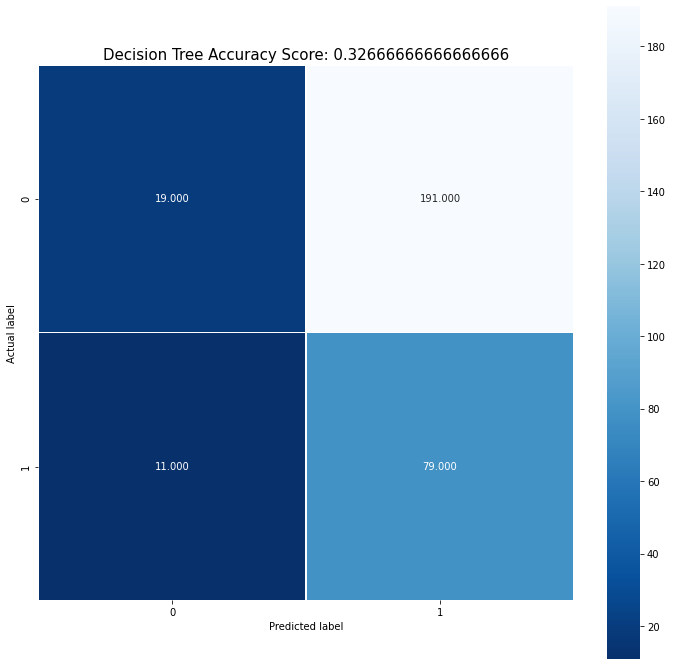

In [128]:
#Tính ma trận nhầm lẫn
from sklearn import metrics
# t1 = end_time - start_time
# print('thời gian chạy thuật là', t1)
p1 = metrics.accuracy_score(germany_label_test, predict_novel2['label_hat_m1_p4_Y1.0'].to_list())
print("Accuracy", p1)
print("Report", metrics.classification_report(germany_label_test, predict_novel2['label_hat_m1_p4_Y1.0'].to_list()))

tree_cm = metrics.confusion_matrix(germany_label_test, predict_novel2['label_hat_m1_p4_Y1.0'].to_list())
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(p1)
plt.title(title, size = 15)

### 4.2. Novel similarity classifier (PCA, 8 PCs)

In [129]:
# convert train and test set to dataframe:
df_pca_germany_dataset_train_scaled = pd.DataFrame(pca_germany_dataset_train_scaled)
df_pca_germany_dataset_test_scaled = pd.DataFrame(pca_germany_dataset_test_scaled)
df_pca_germany_dataset_train_scaled['label'] = germany_label_train
df_pca_germany_dataset_test_scaled['label'] = germany_label_test
#-------------------------------------------------------
df_pca_germany_dataset_train_scaled
# Get list of target variable:
listLabels = df_germany_dataset_train_scaled.drop_duplicates(subset = c)
listLabels = listLabels[c].to_list()
#---------------------------------------------------------
# Novel similarity classifier:
# Tach tap train thanh n tap con (n = so label)
datasTrainNovel = {}
for target in listLabels:
    dataTrain_son = df_pca_germany_dataset_train_scaled[df_pca_germany_dataset_train_scaled[c] == target]
    del dataTrain_son[c]
    datasTrainNovel[target] = dataTrain_son
  

In [130]:
# Ideal Vectors and Centres
idealVectosAndCentres = get_ideal_vectors_and_centres (k, list_Y, c, datasTrainNovel)

In [132]:
predict_novel1 = predict_novel_similarity_classifiers (df_pca_germany_dataset_test_scaled, f, turns, listLabels, idealVectosAndCentres)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [133]:
results = cal_error_novel(predict_novel1, turns, c)
results

[{'% chính xác': 51.33, 'Y': 'p/2', 'm': 1, 'p': 1},
 {'% chính xác': 51.33, 'Y': 1, 'm': 1, 'p': 1},
 {'% chính xác': 45.0, 'Y': 'p/2', 'm': 1, 'p': 2},
 {'% chính xác': 43.67, 'Y': 1, 'm': 1, 'p': 3},
 {'% chính xác': 43.67, 'Y': 'p/2', 'm': 1, 'p': 3},
 {'% chính xác': 40.0, 'Y': 1, 'm': 1, 'p': 4},
 {'% chính xác': 40.0, 'Y': 'p/2', 'm': 1, 'p': 4},
 {'% chính xác': 37.33, 'Y': 1, 'm': 1, 'p': 5},
 {'% chính xác': 37.33, 'Y': 'p/2', 'm': 1, 'p': 5},
 {'% chính xác': 36.0, 'Y': 1, 'm': 1, 'p': 6},
 {'% chính xác': 30.67, 'Y': 'p/2', 'm': 1, 'p': 6},
 {'% chính xác': 34.33, 'Y': 1, 'm': 1, 'p': 7},
 {'% chính xác': 49.67, 'Y': 'p/2', 'm': 1, 'p': 7},
 {'% chính xác': 33.33, 'Y': 1, 'm': 1, 'p': 8},
 {'% chính xác': 51.33, 'Y': 'p/2', 'm': 1, 'p': 8},
 {'% chính xác': 33.67, 'Y': 1, 'm': 1, 'p': 9},
 {'% chính xác': 50.0, 'Y': 'p/2', 'm': 1, 'p': 9},
 {'% chính xác': 32.33, 'Y': 1, 'm': 1, 'p': 10},
 {'% chính xác': 49.67, 'Y': 'p/2', 'm': 1, 'p': 10},
 {'% chính xác': 40.67, 'Y': 'p/

Accuracy 0.6566666666666666
Report               precision    recall  f1-score   support

           1       0.71      0.86      0.78       210
           2       0.36      0.19      0.25        90

    accuracy                           0.66       300
   macro avg       0.54      0.52      0.51       300
weighted avg       0.61      0.66      0.62       300



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.6566666666666666')

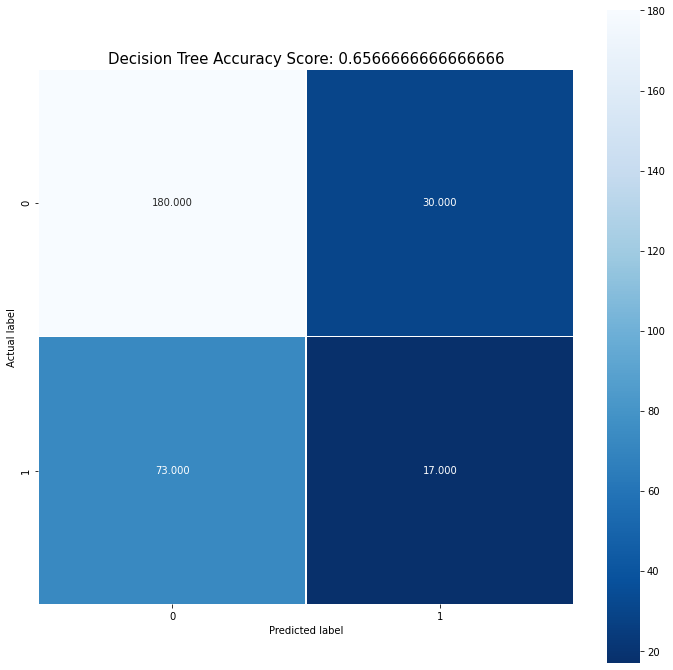

In [134]:
#Tính ma trận nhầm lẫn
from sklearn import metrics
# t1 = end_time - start_time
# print('thời gian chạy thuật là', t1)
p1 = metrics.accuracy_score(germany_label_test, predict_novel1['label_hat_m10_p10_Y5.0'].to_list())
print("Accuracy", p1)
print("Report", metrics.classification_report(germany_label_test, predict_novel1['label_hat_m10_p10_Y5.0'].to_list()))

tree_cm = metrics.confusion_matrix(germany_label_test, predict_novel1['label_hat_m10_p10_Y5.0'].to_list())
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(p1)
plt.title(title, size = 15)

## V. Thuật toán khác

### 5.1. K-nearest neighbors


Với k = 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(germany_dataset_train,germany_label_train)

In [ ]:
# hiển thị 5 dự đoán mô hình đầu tiên trên dữ liệu thử nghiệm 
knn.predict(germany_dataset_test)[0:5]

In [ ]:
#Kiểm tra độ chính xác của mô hình trên bộ dữ liệu test
print('Độ chính xác của KNN với k = 1 là: ')
knn.score(germany_dataset_test, germany_label_test)


Với k = 10

In [ ]:
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
knn1.fit(germany_dataset_train,germany_label_train)
print('Độ chính xác của KNN với k = 10 là: ')
knn1.score(germany_dataset_test, germany_label_test)

### 5.2. Decision Tree

In [ ]:
#Decision Tree # thự viện decision 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import time

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0)
start_time = time.time()
clf.fit(germany_dataset_train, germany_label_train)

In [ ]:
tree_pred = clf.predict(germany_dataset_test)
end_time = time.time()

In [ ]:
t1 = end_time - start_time
print('thời gian chạy thuật là', t1)
p1 = metrics.accuracy_score(germany_label_test, tree_pred)
print("Accuracy", p1)
print("Report", metrics.classification_report(germany_label_test, tree_pred))

In [ ]:
#Tính ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(p1)
plt.title(title, size = 15)

In [ ]:
#Vẽ ra cây ID3
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled = True, fontsize = 10)
plt.savefig('Decision Tree', dpi = 100)

In [ ]:
#Tìm ra các nhân tố quan trọng
plt.bar(range(X_train.shape[1]), clf.feature_importances_)
plt.xticks(range(X_train.shape[1]), ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25'])